##### 倒數計時自動拍照效果
不論是數位相機還是手機的相機，都會具備「倒數計時自動拍照」的功能，這篇教學會介紹使用 OpenCV，實作倒數計時自動拍照的效果\
( 按下鍵盤後倒數秒數，時間到就會出現快門閃爍的效果進行拍照 )。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 拍照時的快門閃爍效果 
使用手機倒數計時拍照時，在拍照的當下會出現快門閃爍效果 ( 整個畫面全白，然後白色逐漸消失再出現原本的畫面 )，為了實現這個效果，\
必須要建立一個「全白」的圖片 ( 使用負片效果將 numpy 產生的全黑圖片反轉 )，透過「權重疊加」的方式將白色圖片與原本影像重疊，\
接著讓白色慢慢消失，就能製作出類似閃爍一下的效果。

* 參考：[addWeighted() 影像權重疊加](https://steam.oxxostudio.tw/category/python/ai/opencv-add.html#a2)

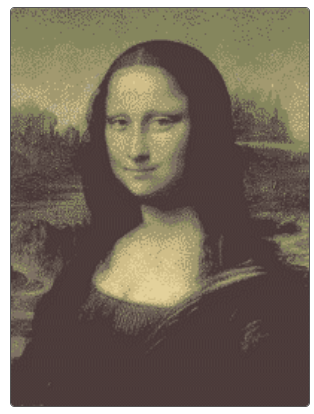

In [ ]:
import cv2
import numpy as np

img = cv2.imread('meme_1.jpg')                       # 開啟圖片
img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)          # 轉換成 BGRA ( 因為需要 alpha 色版 )
w = img.shape[1]                                     # 取得寬度
h = img.shape[0]                                     # 取得高度
white = 255 - np.zeros((h,w,4), dtype='uint8')       # 建立白色圖
a = 1                                                # 一開始 a 為 1
while True:
    a = a - 0.01                                     # a 不斷減少 0.01
    if a<0: a = 0                                    # 如果 a 小於 0 就讓 a 等於 0
    output = cv2.addWeighted(white, a, img, 1-a, 0)  # 根據 a 套用權重
    cv2.imshow('oxxostudio', output)                 # 顯示圖片
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()                           # 所有作業都完成後，釋放資源
cv2.destroyAllWindows()                 # 結束所有視窗

由於 imshow 如果指定同一個視窗，則在程式中只能出現一次，根據這個規則改寫程式，加入偵測「空白鍵」的功能，當按下空白鍵時，\
才會出現閃爍效果。

* 參考：[偵測鍵盤行為](https://steam.oxxostudio.tw/category/python/ai/opencv-keyboard.html)

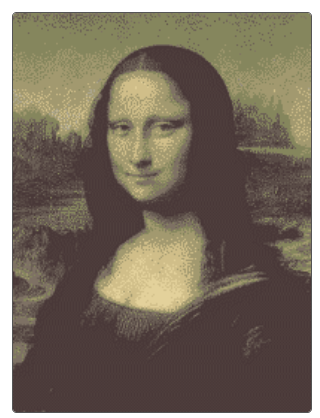

In [ ]:
import cv2
import numpy as np

img = cv2.imread('meme_1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA) # 轉換成 BGRA ( 因為需要 alpha 色版 )
w = img.shape[1]           # 取得寬度
h = img.shape[0]           # 取得高度
white = 255 - np.zeros((h,w,4), dtype='uint8')  # 產生全白圖片
a = 0                       # 開始時 a 等於 0
while True:

    key = cv2.waitKey(1)    # 偵測按鍵
    if key == 32:           # 如果按下空白鍵
        a = 1               # 如果按下空白鍵，讓 a 等於 1
    elif key == ord('q'):   # 如果按下 q 鍵
        break               # 就離開迴圈

    if a == 0:
        output = img.copy() # 如果 a 等於 0，複製來源圖片為 output
    else:
        output = cv2.addWeighted(white, a, img, 1-a, 0)  # 如果 a 等於 1，根據 a 套用權重
        a = a - 0.01        # a 不斷減少 0.01
        if a<0: a = 0       # 如果 a 小於 0 就讓 a 等於 0

    cv2.imshow('oxxostudio', output)

cap.release()
cv2.destroyAllWindows()

##### 按下空白鍵就拍照 
參考「[讀取並播放影片](https://steam.oxxostudio.tw/category/python/ai/opencv-read-video.html)」以及「[寫入並儲存圖片](https://steam.oxxostudio.tw/category/python/ai/opencv-write-image.html)」文章，將程式修改成讀取攝影鏡頭的影片，\
並在按下空白鍵時，將當下的圖片存檔，就能實現按下空白鍵拍照 ( 包含快門閃爍 ) 的效果。

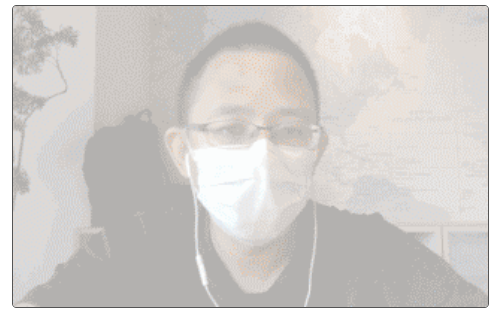

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

a = 0    # 白色圖片透明度
n = 0    # 檔名編號

if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, img = cap.read()               # 讀取影片的每一幀
    if not ret:
        print("Cannot receive frame")   # 如果讀取錯誤，印出訊息
        break
    img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)  # 轉換顏色為 BGRA
    w = int(img.shape[1]*0.5)           # 縮小寬度為一半
    h = int(img.shape[0]*0.5)           # 縮小高度為一半
    img = cv2.resize(img,(w,h))         # 縮放尺寸
    white = 255 - np.zeros((h,w,4), dtype='uint8')   # 產生全白圖片

    key = cv2.waitKey(1)
    if key == 32:            # 按下空白將 a 等於 1
        a = 1
    elif key == ord('q'):    # 按下 q 結束
        break
    if a == 0:
        output = img.copy()  # 如果 a 為 0，設定 output 變數為來源圖片的拷貝
    else:
        photo = img.copy()   # 如果 a 不為 0，設定 photo 變數為來源圖片的拷貝
        output = cv2.addWeighted(white, a, photo, 1-a, 0)  # 計算權重，產生白色慢慢消失效果
        a = a - 0.1
        if a<0:
            a = 0
            n = n + 1
            cv2.imwrite(f'photo-{n}.jpg', photo)   # 存檔

    cv2.imshow('oxxostudio', output)               # 顯示圖片

cap.release()                           # 所有作業都完成後，釋放資源
cv2.destroyAllWindows()                 # 結束所有視窗

##### 按下空白鍵，倒數計時自動拍照 
參考「[影像加入文字](https://steam.oxxostudio.tw/category/python/ai/opencv-text.html)」文章，修改程式，在程式中新增一個 sec 秒數的變數以及對應的判斷\
，當按下空白鍵時，在畫面中出現出現倒數的秒數，當秒數為 0 時就進行拍照。

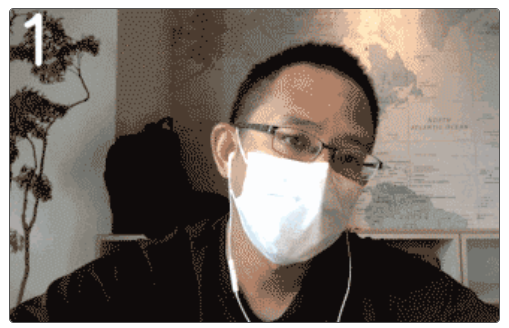

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

# 定義加入文字的函式
def putText(source, x, y, text, scale=2.5, color=(255,255,255)): # 定義函式
    org = (x,y) # 設定文字位置
    fontFace = cv2.FONT_HERSHEY_SIMPLEX # 設定字型
    fontScale = scale # 設定文字大小
    thickness = 5 # 設定文字粗細
    lineType = cv2.LINE_AA # 設定文字線條
    cv2.putText(source, text, org, fontFace, fontScale, color, thickness, lineType) # 加入文字

a = 0   # 白色圖片透明度
n = 0  # 檔名編號

if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, img = cap.read()
    if not ret:
        print("Cannot receive frame")
        break
    img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
    w = int(img.shape[1]*0.5)
    h = int(img.shape[0]*0.5)
    img = cv2.resize(img,(w,h))
    white = 255 - np.zeros((h,w,4), dtype='uint8')

    key = cv2.waitKey(1)
    if key == 32:
        a = 1
        sec = 4  # 加入倒數秒數
    elif key == ord('q'):
        break
    if a == 0:
        output = img.copy()
    else:
        output = img.copy()  # 設定 output 和 photo 變數
        photo = img.copy()   # 為來源圖片的拷貝
        sec = sec - 0.05     # sec 不斷減少 0.05 ( 根據個人電腦效能設定，使其搭配 while 迴圈看起來像倒數一秒 )
        putText(output, 10, 70, str(int(sec)))  # 加入文字
        # 如果秒數小於 1
        if sec < 1:
            output = cv2.addWeighted(white, a, photo, 1-a, 0) # 計算權重，產生白色慢慢消失效果
            a = a - 0.1         # a 不斷減少 0.1
            if a<0:             # 如果 a 小於 0
                a = 0           # 就讓 a 等於 0
                n = n + 1       # 檔名編號加 1
                cv2.imwrite(f'photo-{n}.jpg', photo)    # 存檔
    cv2.imshow('oxxostudio', output)                    # 顯示圖片

cap.release()                          # 釋放資源
cv2.destroyAllWindows()                # 關閉所有視窗